https://diffeq.sciml.ai/stable/basics/integrator/

In [1]:
using DiffEqPhysics
using DifferentialEquations
using Plots
default(fmt = :png, size = (450, 250))
using StaticArrays

module My
mutable struct ParamSinglePendulum{Tg, Tl}
    g::Tg
    l::Tl
end
end

function singlependulum(p, q, param, t = nothing)
    (; g, l) = param
    dθ = p[1]
    θ = q[1]
    (1/2)*(dθ/l)^2 - g*l*cos(θ)
end

plot_singlependulum(sol) = plot(sol; label=["dθ/dt" "θ"], legend=:outertopright)

plot_singlependulum (generic function with 1 method)

In [2]:
param = My.ParamSinglePendulum(9.8, 1.0) # on the earth
q0 = SVector(-0.9π)
p0 = SVector(0.0)
tspan = (0.0, 10.0)
prob = HamiltonianProblem(singlependulum, p0, q0, tspan, param)

ODEProblem with uType ArrayPartition{Float64, Tuple{SVector{1, Float64}, SVector{1, Float64}}} and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: ([0.0], [-2.827433388230814])

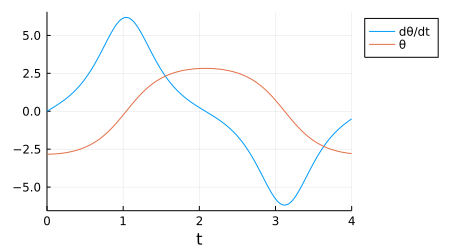

In [3]:
integrator = init(prob, Tsit5())
param.g = 9.8 # on the earth
dt = 0.1
for _ in 1:40
    step!(integrator, 0.1, true)
end
plot_singlependulum(integrator.sol)

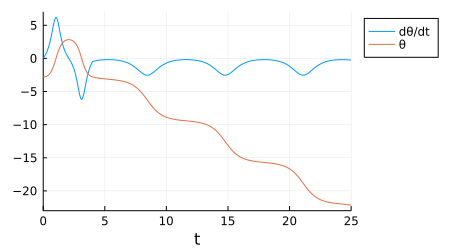

In [4]:
param.g = 1.6 # on the moon
dt = 0.1
for _ in 1:210
    step!(integrator, 0.1, true)
end
plot_singlependulum(integrator.sol)

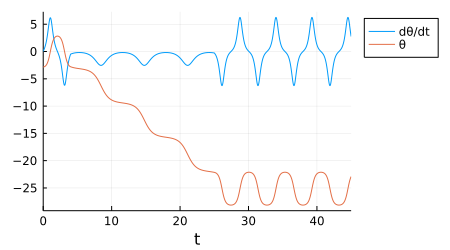

In [5]:
param.g = 9.8 # on the earth
dt = 0.1
for _ in 1:200
    step!(integrator, 0.1, true)
end
plot_singlependulum(integrator.sol)